<a href="https://colab.research.google.com/github/SakanaTakina/CSC3160/blob/main/%E2%80%9Cassignment_1_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/MDS6002)

This is an instruction and template for the first assignment. In this assignment, you will utilize various tools to extract spectrogram features, perform speech recognition, generate speech, and align speech. Additionally, you will summarize the provided research paper. 

Should you have any inquiries, please feel free to ask in the GitHub discussion forum found at: https://github.com/orgs/SLPcourse/discussions/categories/assignments.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [1]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


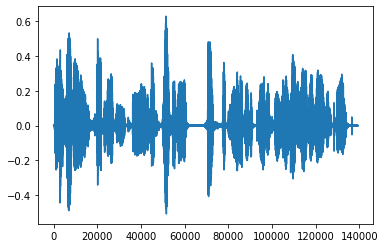

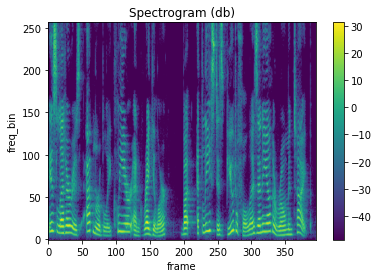

In [2]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform) 

# create an object that extract spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [10 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



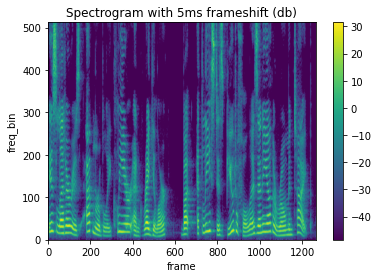

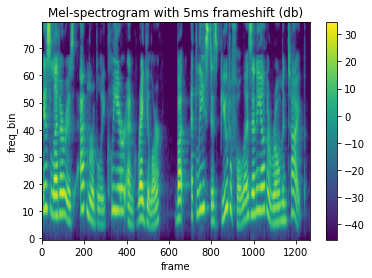

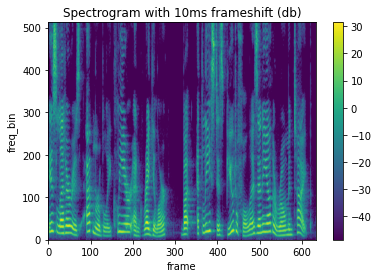

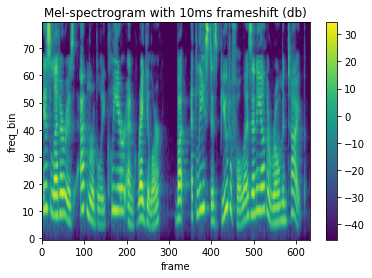

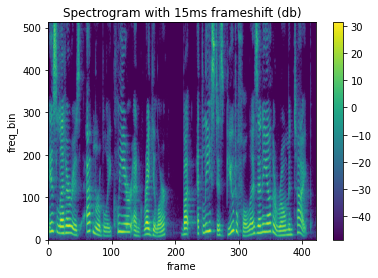

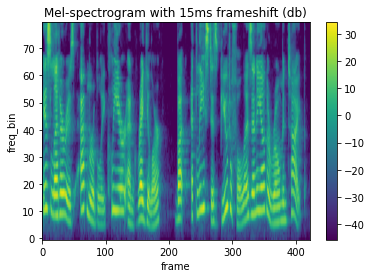

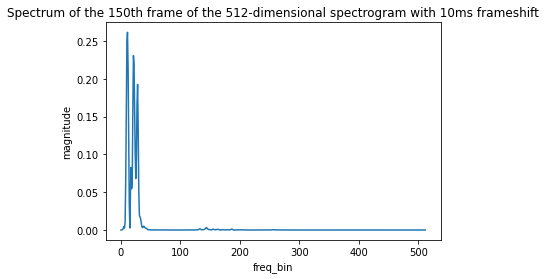

In [3]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 1024
n_mels = 80

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# Url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# Request the url
r = requests.get(url)

# Filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# Load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# Create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# Resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# Set window size 30ms
win_length = (int(target_sample_rate * 0.03))

# Extract spectrogram and mel-spectrogram with 5ms frameshift
hop_length = int(target_sample_rate * 0.005)
spectrogram_5ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_5ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# Extract spectrogram and mel-spectrogram with 10ms frameshift
hop_length = int(target_sample_rate * 0.01)
spectrogram_10ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_10ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# Extract spectrogram and mel-spectrogram with 15ms frameshift
hop_length = int(target_sample_rate * 0.015)
spectrogram_15ms = T.Spectrogram(n_fft=n_fft, hop_length=hop_length, win_length=win_length, power=2)(resampled_waveform)
mel_spectrogram_15ms = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, hop_length=hop_length, win_length=win_length)(resampled_waveform)

# Visualize each of the power spectorgram and 80-dimensional mel-spectrogram
plot_spectrogram(spectrogram_5ms[0], title="Spectrogram with 5ms frameshift (db)")
plot_spectrogram(mel_spectrogram_5ms[0], title="Mel-spectrogram with 5ms frameshift (db)")
plot_spectrogram(spectrogram_10ms[0], title="Spectrogram with 10ms frameshift (db)")
plot_spectrogram(mel_spectrogram_10ms[0], title="Mel-spectrogram with 10ms frameshift (db)")
plot_spectrogram(spectrogram_15ms[0], title="Spectrogram with 15ms frameshift (db)")
plot_spectrogram(mel_spectrogram_15ms[0], title="Mel-spectrogram with 15ms frameshift (db)")

# Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift
frame = spectrogram_10ms[0,:,149].t().numpy()
plt.figure()
plt.plot(frame)
plt.xlabel('freq_bin')
plt.ylabel('magnitude')
plt.title('Spectrum of the 150th frame of the 512-dimensional spectrogram with 10ms frameshift')
plt.show()


## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [4]:
import requests
import torchaudio
import torchaudio.transforms as T

target_sample_rate = 16000

# Url to find the audio sample
url = "https://github.com/SakanaTakina/CSC3160/raw/main/own.wav"
# Request the url
r = requests.get(url)

# Filename, where to save the audio
filename = "own.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# Load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# Create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# Resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# Save the resampled recording
torchaudio.save(filename, resampled_waveform, target_sample_rate, bits_per_sample=16)


## (3) [10 marks] Speech recognition with Whisper model

[Whisper](https://github.com/openai/whisper) is a general-purpose speech recognition model released by OpenAI. Your task is to use the whisper model to perform speech recognition on the provided audio sample and your own recording. 

In [5]:
!pip install -U openai-whisper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 76.0 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230124-py3-none-any.whl size=1179329 sha256=fe2f28b048c12f53d2d17d8fc4fbfb6757d6e3f2a2fa713454f7cbaa279027a3
  Stored in directory: /root/.cache/pip/wheels/48/c2/dd/8639c7cda1e20412e499ab65e5003d8863ef8622792ea26446
Successfully built openai-whisper


In [6]:
import whisper

# Build whisper model
model = whisper.load_model("base")

# Transcribe the audio
sample = model.transcribe("LJ001-0048.wav")
own = model.transcribe("own.wav")
print("sample: " + sample["text"])
print("my own: " + own["text"])

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 134MiB/s]


sample:  His letter is admirably clear and regular, but at least as beautiful as any other Roman type.
my own:  His letter is edamallfully clear and irregular, but at least as beautiful as any other room in time.


## (4) [10 marks] Text-to-speech synthesis

Text-to-speech synthesis is to generate speech for a given text. Torchaudio has provided pretrained [Tacotron2-based model](https://pytorch.org/audio/stable/generated/torchaudio.pipelines.Tacotron2TTSBundle.html#torchaudio.pipelines.Tacotron2TTSBundle). Your task is to 
* Use the pretrained bundle to generate speech using the Character-based TTS pipeline with Tacotron2 and WaveRNN.
* Use the pretrained bundle to generate speech using the Phoneme-based TTS pipeline with Tacotron2 and WaveRNN.
* Discuss the difference between two audio samples from the above two pipelines.

The script you need to use for the text-to-speech synthesis task:

`I am <YOUR_NAME>, my student ID is <YOUR_STUDENT_ID>. I am taking the [CSC3160/MDS6002] course this semester.`


***Note: Replace `<YOUR_NAME>` and `<YOUR_STUDENT_ID>` with your real name and your student ID, respectively.***

In [7]:
import torchaudio

text_1 = "I am Cao Ran, my student ID is"
text_2 = "one two zero zero nine zero one two six."
text_3 = "I am taking the CSC three one six zero course this semester."
bundle_C = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH

# Build processor, Tacotron2 and WaveRNN model
processor = bundle_C.get_text_processor()
tacotron2 = bundle_C.get_tacotron2()
vocoder = bundle_C.get_vocoder()

# Encode text
input, lengths = processor(text_1)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Character-based_1.wav', waveforms, vocoder.sample_rate)

# Encode text
input, lengths = processor(text_2)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Character-based_2.wav', waveforms, vocoder.sample_rate)

# Encode text
input, lengths = processor(text_3)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Character-based_3.wav', waveforms, vocoder.sample_rate)

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth


  0%|          | 0.00/16.7M [00:00<?, ?B/s]

In [8]:
!pip install deep-phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=beea43db40fc8b3c25fc6fa2230bdaba3f55cd92e51de035318dba5d97b9df58
  Stored in directory: /root/.cache/pip/wheels/e4/cc/ce/e329d15bd6374b9bcdc717d00c4d0f934c3ca2091ebf0a1968
Successfully built deep-phonemizer


In [1]:
import torchaudio

text_1 = "I am Cao Ran, my student ID is"
text_2 = "one two zero zero nine zero one two six."
text_3 = "I am taking the CSC three one six zero course this semester."
bundle_P = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

# Build processor, Tacotron2 and WaveRNN model
processor = bundle_P.get_text_processor()
tacotron2 = bundle_P.get_tacotron2()
vocoder = bundle_P.get_vocoder()

# Encode text
input, lengths = processor(text_1)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Phoneme-based_1.wav', waveforms, vocoder.sample_rate)

# Encode text
input, lengths = processor(text_2)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Phoneme-based_2.wav', waveforms, vocoder.sample_rate)

# Encode text
input, lengths = processor(text_3)

# Generate (mel-scale) spectrogram
specgram, lengths, _ = tacotron2.infer(input, lengths)

# Convert spectrogram to waveform
waveforms, lengths = vocoder(specgram, lengths)

# Save the generated audio
torchaudio.save('Phoneme-based_3.wav', waveforms, vocoder.sample_rate)

## (5) [10 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html). 

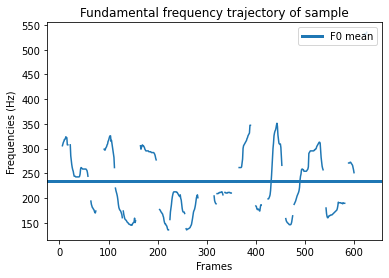

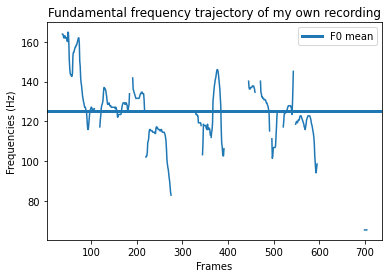

In [3]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import librosa.display

# Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
y, sr = librosa.load("LJ001-0048.wav", sr=16000)
f0_sample, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)

# Calculate F0 mean
f0_sample_mean = np.nanmean(f0_sample)

plt.figure()
plt.xlabel('Frames')
plt.ylabel('Frequencies (Hz)')
plt.title('Fundamental frequency trajectory of sample')
plt.plot(f0_sample)
plt.axhline(f0_sample_mean, label='F0 mean', linewidth=3)
plt.legend(loc='upper right')
plt.show()

# Plot the fundamental frequency trajectory and the F0 mean of my own recording
y, sr = librosa.load("own.wav", sr=16000)
f0_own, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), sr=16000, hop_length=160)

# Calculate F0 mean
f0_own_mean = np.nanmean(f0_own)

plt.figure()
plt.xlabel('Frames')
plt.ylabel('Frequencies (Hz)')
plt.title('Fundamental frequency trajectory of my own recording')
plt.plot(f0_own)
plt.axhline(f0_own_mean, label='F0 mean', linewidth=3)
plt.legend(loc='upper right')
plt.show()


## (6) [20 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using 80-dimensional mel-spectrogram.

Here are your tasks:
* Visualize the alignment 80-dimensional mel-spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [4]:
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


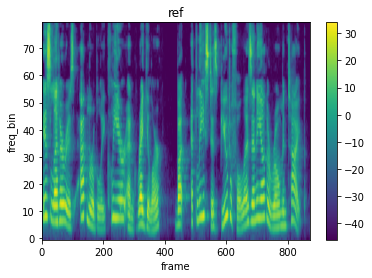

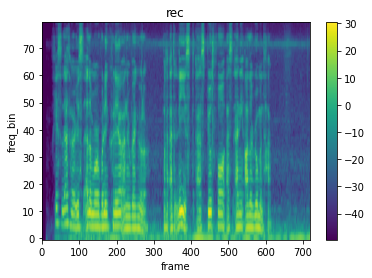

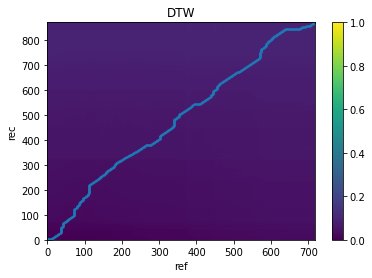

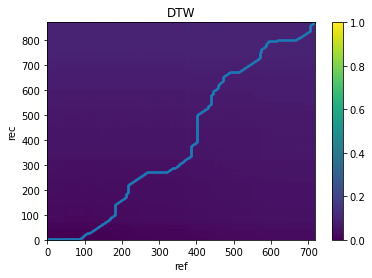

In [6]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 1024
n_mels = 80
win_length = (int(target_sample_rate * 0.03))
hop_length = int(target_sample_rate * 0.01)

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# Load audio

ref_waveform, ref_sample_rate = torchaudio.load("LJ001-0048.wav")
rec_waveform, rec_sample_rate = torchaudio.load("own.wav")

# Get 80-dimensional mel-spectrogram

ref_mel_spectrogram = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, win_length=win_length, hop_length=hop_length)(ref_waveform)
rec_mel_spectrogram = T.MelSpectrogram(n_fft=n_fft, sample_rate=target_sample_rate, n_mels=n_mels, win_length=win_length, hop_length=hop_length)(rec_waveform)

# Get DTW path
distance, path = fastdtw(ref_mel_spectrogram[0,:,:].T, rec_mel_spectrogram[0,:,:].T, dist=euclidean)

dtw_matrix, dtw_path = librosa.sequence.dtw(ref_mel_spectrogram[0], rec_mel_spectrogram[0])

plot_spectrogram(ref_mel_spectrogram[0], "ref")
plot_spectrogram(rec_mel_spectrogram[0], "rec")

# Visualize the wrapped path/map

path_i = []
path_j = []
for i in range(len(path)):
  path_i.append(path[i][0])
  path_j.append(path[i][1])
plt.figure()
plt.imshow(dtw_matrix,origin='lower',interpolation='none',aspect='auto')
plt.clim([dtw_matrix[0,0],10.*dtw_matrix[dtw_matrix.shape[0]-1,dtw_matrix.shape[1]-1]])
plt.scatter(path_j, path_i, s=1)
plt.xlabel('ref')
plt.ylabel('rec')
plt.title('DTW')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(dtw_matrix,origin='lower',interpolation='none',aspect='auto')
plt.clim([dtw_matrix[0,0],10.*dtw_matrix[dtw_matrix.shape[0]-1,dtw_matrix.shape[1]-1]])
plt.scatter(dtw_path[:,1], dtw_path[:,0], s=1)
plt.xlabel('ref')
plt.ylabel('rec')
plt.title('DTW')
plt.colorbar()
plt.show()

# I don't know which DTW path is correct, or there is no unique answer?

## (7) [30 marks] Paper reading

Please read the paper provided below and summarize its key points in 200-300 words. Your summary should include
* a description of the problem being addressed
* the paper's main contributions
* the metrics used for evaluation, and the experimental results
* the findings from the paper

[*PitchNet: Unsupervised Singing Voice Conversion with Pitch Adversarial Network*](https://arxiv.org/abs/1912.01852)

**Note: longer than 300 words may have negative impact.**

```
Singing synthesis have broad applications in different prospects, but the existing approach cannot model the pitch information precisely and the converted singing voice can be easily out of key. The authors advance the existing unsupervised singing voice conversion method by adding an adversarially trained pitch regression network to enforce the encoder network to learn pitch invariant phoneme representation, and a separate module to feed pitch extracted from the source audio to the decoder network.
```

